## Import Libraries And Read The Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('data/main.csv')

## Correlation Heatmap

In [3]:
corr_df = df[df['year'] == 2019]
corr_df.drop(['rank','year'], axis =1, inplace=True)

C:\Users\white\AppData\Local\Temp\ipykernel_17044\1465121674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df.drop(['rank','year'], axis =1, inplace=True)


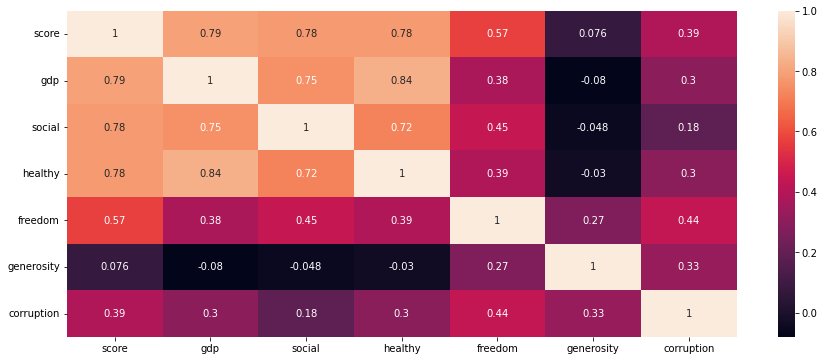

In [4]:
plt.figure(figsize = (15,6))
corr = corr_df.corr()
ax = sns.heatmap(corr, annot=True)

## Multiple Linear Regression

$$
Yhat = a + b_1X_1 + b_2X_2 + b_3X_3 + b_4X4 + b_5X_5
$$

In [5]:
def multipleLinearRegression(df, year):
    mlr_df = df[df['year'] == year]

    x = mlr_df[['gdp','healthy','social','freedom','corruption']].values
    y = mlr_df['score'].values.reshape(-1,1)
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state=0)
    
    mlr = LinearRegression()
    mlr.fit(x_train,y_train)
    
    #visualization
    print("Year: ", year)
    print("a: ", mlr.intercept_)
    print("b1,b2,b3,b4,b5: ", mlr.coef_)  
    y_predict = pd.DataFrame(mlr.predict(x_test))
    y_test = pd.DataFrame(y_test)
    print("MSE: ", mean_squared_error(y_test,y_predict))
    print("R_Score: ", r2_score(y_test,y_predict))
    print(" ")
    result = pd.concat([y_predict,y_test],axis=1)
    result.columns = ['y_predict','y_test']
    result.sort_values(by='y_test', ascending=False, axis = 0, inplace = True)
    
    return result

In [6]:
mlr_df = multipleLinearRegression(df, 2015)
mlr_df = multipleLinearRegression(df, 2016)
mlr_df = multipleLinearRegression(df, 2017)
mlr_df = multipleLinearRegression(df, 2018)
mlr_df = multipleLinearRegression(df, 2019)
mlr_df.sample(10)

Year:  2015
a:  [1.74324476]
b1,b2,b3,b4,b5:  [[1.08103394 1.02158032 1.34763303 1.44338868 0.55042165]]
MSE:  0.3660601026316571
R_Score:  0.6809475275805172
 
Year:  2016
a:  [2.13730967]
b1,b2,b3,b4,b5:  [[0.72240511 1.63599514 1.04944829 2.00407152 0.27854114]]
MSE:  0.3243787215426371
R_Score:  0.6876172131226718
 
Year:  2017
a:  [1.82483826]
b1,b2,b3,b4,b5:  [[0.85676437 0.7975147  1.17732944 1.82727928 0.81686725]]
MSE:  0.24223474706028356
R_Score:  0.7923658099177294
 
Year:  2018
a:  [1.91033549]
b1,b2,b3,b4,b5:  [[1.1727951  0.74263114 0.96642913 1.70395708 0.41747184]]
MSE:  0.3239916266421528
R_Score:  0.7023581105336322
 
Year:  2019
a:  [1.73624205]
b1,b2,b3,b4,b5:  [[0.73550584 0.86902226 1.45020422 1.25771992 1.3136009 ]]
MSE:  0.3815470312305532
R_Score:  0.6410560299083263
 


,y_predict,y_test
12,5.186513,4.700
43,6.401841,6.892
29,5.568967,5.082
42,5.838232,5.011
13,4.396281,4.516
4,6.179371,6.446
34,5.830567,6.595
50,6.482577,6.118
1,6.455561,5.893
25,4.520984,3.231


## Polynomial Regression

$$
Y = a + b_1 X +b_2 X^2\\\\
$$


In [7]:
def polynomialRegression(df, year):
    pr_df = df[df['year'] == year]

    x = pr_df['gdp'].values.reshape(-1,1)
    y = pr_df['score'].values.reshape(-1,1)
    
    pr = PolynomialFeatures(degree = 2)
    x_polynomial = pr.fit_transform(x)
    lr = LinearRegression()
    lr.fit(x_polynomial,y)
           
    y_predict = lr.predict(x_polynomial)
    
    #visualization
    plt.scatter(pr_df["gdp"],pr_df["score"])
    plt.xlabel("GDP per Capital")
    plt.ylabel("Score")
    plt.plot(x,y_predict,color= "green",label = "line")
    plt.legend()
    plt.show()
    print("Year: ", year)
    print("a: ", lr.intercept_)
    print("b1,b2: ", lr.coef_)
    print("MSE: ", mean_squared_error(y,y_predict))
    print("R_Score: ", r2_score(y,y_predict))
    print("")

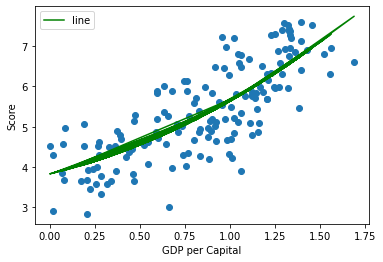

Year:  2015
a:  [3.83108783]
b1,b2:  [[0.         1.0555801  0.74249079]]
MSE:  0.49348038733780686
R_Score:  0.6212011342870815



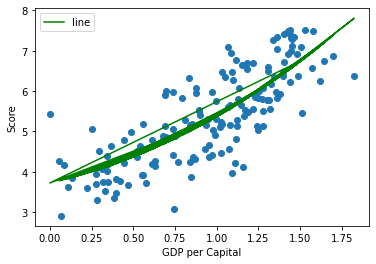

Year:  2016
a:  [3.72072523]
b1,b2:  [[0.         0.92993856 0.71768587]]
MSE:  0.469531143386362
R_Score:  0.6374602730246091



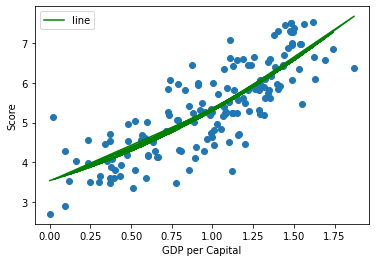

Year:  2017
a:  [3.53604497]
b1,b2:  [[0.         1.23539772 0.52501647]]
MSE:  0.422282614827247
R_Score:  0.6678668056814985



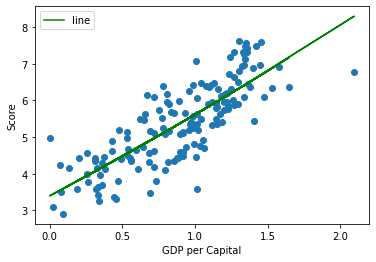

Year:  2018
a:  [3.39817011]
b1,b2:  [[0.         2.09750596 0.11393198]]
MSE:  0.44357445819185853
R_Score:  0.6437895187445282



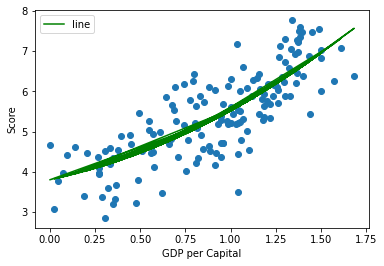

Year:  2019
a:  [3.80056687]
b1,b2:  [[0.         0.94914479 0.7650174 ]]
MSE:  0.43961238312006345
R_Score:  0.6429089644256275



In [8]:
polynomialRegression(df,2015)
polynomialRegression(df,2016)
polynomialRegression(df,2017)
polynomialRegression(df,2018)
polynomialRegression(df,2019)

## Linear Regression

$$
Yhat = a + b  X
$$


In [9]:
def linearRegression(df,year):
    pr_df = df[df['year'] == year]

    x = pr_df['gdp'].values.reshape(-1,1)
    y = pr_df['score'].values.reshape(-1,1)
    
    lr = LinearRegression()
    lr.fit(x,y)
    
    #visualization
    y_predict = lr.predict(x)
    plt.scatter(x,y)
    plt.plot(x, y_predict,color = "red")
    plt.xlabel("gdp")
    plt.ylabel("score")
    plt.title("Linear Regression")
    plt.show()
    print("Year: ", year)
    print("a: ", lr.intercept_)
    print("b: ", lr.coef_)
    print("MSE: ", mean_squared_error(y,y_predict))
    print("R_Score: ", r2_score(y,y_predict))

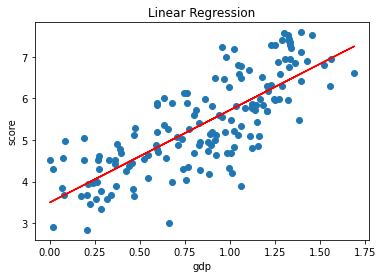

Year:  2015
a:  [3.49880966]
b:  [[2.21822712]]
MSE:  0.5081936248777403
R_Score:  0.6099071541531225


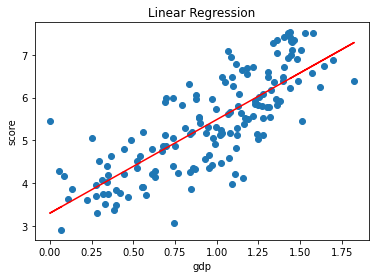

Year:  2016
a:  [3.29618004]
b:  [[2.18686322]]
MSE:  0.4861751800515043
R_Score:  0.6246088901220189


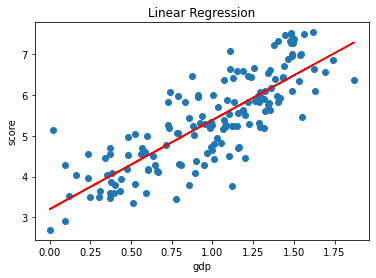

Year:  2017
a:  [3.20321268]
b:  [[2.18418495]]
MSE:  0.43215056729547646
R_Score:  0.6601054760421123


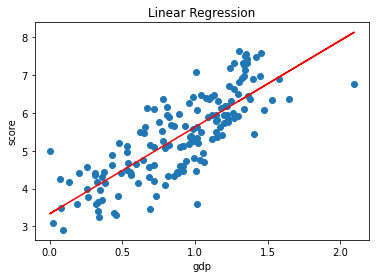

Year:  2018
a:  [3.33339939]
b:  [[2.29123362]]
MSE:  0.4440559910777007
R_Score:  0.6434028259180175


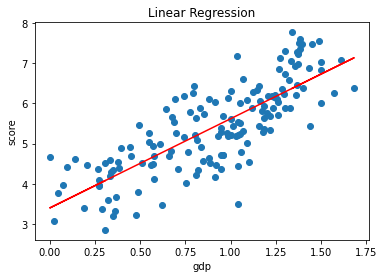

Year:  2019
a:  [3.39934518]
b:  [[2.218148]]
MSE:  0.4551967397324354
R_Score:  0.6302500079104005


In [10]:
linearRegression(df,2015)
linearRegression(df,2016)
linearRegression(df,2017)
linearRegression(df,2018)
linearRegression(df,2019)